# Table of contents 📚 <a class='anchor' id='top'></a>

* [Dataset Overview](#chapter1)
* [Exploratory Data Analysis (EDA)](#chapter2)
* [Text Preprocessing](#chapter3)
    * [Lowercase](#section_3_1)
    * [Convert numbers into text](#section_3_2)
    * [Remove punctuation](#section_3_3)
    * [Remove stopwords](#section_3_4)
    * [Remove whitespaces](#section_3_5)
    * [Lemmatization](#section_3_6)
    * [Wordcloud](#section_3_7)
* [Sentiment Analysis](#chapter4)

# 🍕 Dataset Overview ⭐️ <a class="anchor" id="chapter1"></a>

#### The data comes from Google Play and App Store. They were collected from February 12 to 14.

#### **Variables**

* **date** Date the review was posted
* **content** Published review
* **score** The number of stars awarded by the user
* **userName** Name of the user
* **app** Application name
* **platform** Google play or App Store
* **replyContent** Reply to review
* **repliedDate** Publication date response to review
* **appVersion** Version of application, not platform

<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbG5yeWluOXdiaWJpdXEwMzd5b3EwcTl6b3p4ZXN5emZnMzB3dng2aCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/dxPSj5kctYUpXOS4Tp/giphy.gif">

# Exploratory Data Analysis (EDA) ✏️ <a class="anchor" id="chapter2"></a>

In [1]:
pip install inflect

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import numpy as np
import pandas as pd
from tabulate import tabulate

import string
import re
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import inflect
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_d

In [4]:
# Load the dataset
file_path = '/kaggle/input/food-delivery-apps-reviews/food_delivery_apps.csv'
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
data.head()

,date,content,score,userName,app,platform,replyContent,repliedDate,appVersion
0,2022-10-20 17:08:18,"Being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store,NaN,NaN,NaN
1,2022-08-19 15:56:51,App is well-designed and nice to use. Only com...,4,henhouse,Bolt Food,App Store,NaN,NaN,NaN
2,2023-07-26 09:03:32,I’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store,NaN,NaN,NaN
3,2022-11-22 10:00:43,Live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store,NaN,NaN,NaN
4,2023-06-14 09:04:39,After waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store,NaN,NaN,NaN


In [6]:
# Check the general data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247061 entries, 0 to 1247060
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   date          1247061 non-null  object
 1   content       1247061 non-null  object
 2   score         1247061 non-null  int64 
 3   userName      1247061 non-null  object
 4   app           1247061 non-null  object
 5   platform      1247061 non-null  object
 6   replyContent  203760 non-null   object
 7   repliedDate   203760 non-null   object
 8   appVersion    973010 non-null   object
dtypes: int64(1), object(8)
memory usage: 85.6+ MB


In [7]:
# Check for missing values
has_missing_values = data.isnull().any().any()

if has_missing_values:
    print("Missing values found in the dataset.")
else:
    print("No missing values found in the dataset.")

Missing values found in the dataset.


In [8]:
# Check the percentage of the missing values in each column
percent_missing = data.isnull().sum() * 100 / len(data)

print(percent_missing)

date             0.000000
content          0.000000
score            0.000000
userName         0.000000
app              0.000000
platform         0.000000
replyContent    83.660783
repliedDate     83.660783
appVersion      21.975749
dtype: float64


#### 🔎 We can see that the variables with almost all rows with missing values are "replyContent" and "repliedDate". We will decide to drop these 2 columns because we don't want to use them in our analysis.

In [9]:
# Remove "replyContent" and "repliedDate" columns
data.drop(['replyContent', 'repliedDate'], axis=1, inplace=True)

In [10]:
# Replace the missing values of the "appVersion" column
data.replace(np.nan, 'Do not know', inplace=True)

In [11]:
# Check the data again
data.head(5)

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"Being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,App is well-designed and nice to use. Only com...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,I’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,Live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,After waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store,Do not know


In [12]:
# Extract unique applications
unique_apps = pd.unique(data['app'])

# Convert unique_apps to a list of lists or a list of dictionaries
table_data = [[app] for app in unique_apps]

# Display the table using tabulate
table = tabulate(table_data, headers=['Unique Applications'], tablefmt='pretty')

print(table)

+---------------------+
| Unique Applications |
+---------------------+
|      Bolt Food      |
|        Glovo        |
|       Grubhub       |
|      Uber Eats      |
|        Wolt         |
+---------------------+


#### 🔎 Here, we created a beautiful small table with unique applications. This can help us see how many applications we have and what they are.

In [13]:
# Group by application and calculate mean review score - stars
grouped_df = data.groupby('app')['score'].mean().reset_index()

# Create bar chart
fig = px.bar(grouped_df, x='app', y='score', color = 'app',
             color_discrete_map = {'Bolt Food': '#148C3C', 'Glovo': '#30BFDD', 'Grubhub': '#8690FF', 'Uber Eats': '#AB7811', 'Wolt': '#C358FC'},
             labels={'score': 'Average Score', 'app': 'Application'}, 
             title='Average Score Review by Application',
             text_auto = True)

fig.update_layout(xaxis = {"categoryorder":"total ascending"})
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.update_layout(yaxis_range=[0,4.5])
fig.update_layout(plot_bgcolor='white')

fig.show()

#### 🔎 We created this bar chart to get an idea of which application has the highest score. So, we can observe that the Wolt application has the highest score, with a mean score of approximately 3.9 stars, while Bolt Food has the lowest score, with approximately 2 stars.

# Text Preprocessing 📰 <a class="anchor" id="chapter3"></a>

In [14]:
data["content"] = data["content"].astype(str)

## Lowercase <a class="anchor" id="section_3_1"></a>

In [15]:
data["content"] = data["content"].str.lower()
data.head()

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,app is well-designed and nice to use. only com...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,i’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,after waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store,Do not know


## Conver numbers into text <a class="anchor" id="section_3_2"></a>

In [16]:
# Convert numbers into text
q = inflect.engine() 
  
def convert_num(text): 
    # split strings into list of texts 
    temp_string = text.split() 
    # initialise empty list 
    new_str = [] 
  
    for word in temp_string: 
        # if text is a digit, convert the digit 
        # to numbers and append into the new_str list 
        if word.isdigit(): 
            temp = q.number_to_words(word) 
            new_str.append(temp) 
  
        # append the texts as it is 
        else: 
            new_str.append(word) 
  
    # join the texts of new_str to form a string 
    temp_str = ' '.join(new_str) 
    return temp_str 

data['content'] = data['content'].apply(convert_num)

data.head()

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,app is well-designed and nice to use. only com...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,i’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,after waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store,Do not know


## Remove punctuation <a class="anchor" id="section_3_3"></a>

In [17]:
# Remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    if isinstance(text, str):  # Check if text is a string
        return text.translate(translator)
    elif isinstance(text, list):  # If it's a list of strings, apply to each element
        return [t.translate(translator) for t in text]
    else:
        return text

data['content'] = remove_punctuation(data['content'])

data.head()

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,app is well-designed and nice to use. only com...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,i’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,after waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store,Do not know


#### 🔎 Removing punctuation in natural language processing (NLP) refers to the process of eliminating punctuation marks such as periods, commas, question marks, exclamation points, etc., from text data.

## Remove stopwords <a class="anchor" id="section_3_4"></a>

In [18]:
# Remove stopwords function
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["content"] = data["content"].apply(lambda text: remove_stopwords(text))

data.head()

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"single traveling lot work, around world - used...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,app well-designed nice use. complaint lack app...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,"i’ve payment issue month now, sure ""fraud"" rig...",1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,live activities would nice instead getting con...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,waiting hour food reached restaurant learnt fo...,1,schalas1985,Bolt Food,App Store,Do not know


#### 🔎 Removing stopwords in natural language processing (NLP) involves the elimination of common words that occur frequently in a language but typically do not carry much semantic meaning. These words, known as stopwords, include articles (e.g., "a", "an", "the"), prepositions (e.g., "in", "on", "at"), conjunctions (e.g., "and", "but", "or"), and other high-frequency words.

## Remove whitespaces <a class="anchor" id="section_3_5"></a>

In [19]:
# Remove whitespace from text
def remove_whitespace(text):
    if isinstance(text, str):  # Check if text is a string
        return " ".join(text.split())
    elif isinstance(text, list):  # If it's a list of strings, apply to each element
        return [" ".join(t.split()) for t in text]
    else:
        return text

data['content'] = remove_whitespace(data['content'])

data.head()

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"single traveling lot work, around world - used...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,app well-designed nice use. complaint lack app...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,"i’ve payment issue month now, sure ""fraud"" rig...",1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,live activities would nice instead getting con...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,waiting hour food reached restaurant learnt fo...,1,schalas1985,Bolt Food,App Store,Do not know


## Lemmatization <a class="anchor" id="section_3_6"></a>

In [20]:
lemma=WordNetLemmatizer()

def preprocessdata(text):
    text= ' '.join(lemma.lemmatize(word) for word in text.split(' '))
    return text

data['content']=data['content'].apply(preprocessdata)

data.head()

,date,content,score,userName,app,platform,appVersion
0,2022-10-20 17:08:18,"single traveling lot work, around world - used...",5,TBeck-NARC,Bolt Food,App Store,Do not know
1,2022-08-19 15:56:51,app well-designed nice use. complaint lack app...,4,henhouse,Bolt Food,App Store,Do not know
2,2023-07-26 09:03:32,"i’ve payment issue month now, sure ""fraud"" rig...",1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know
3,2022-11-22 10:00:43,live activity would nice instead getting const...,4,Sussy31,Bolt Food,App Store,Do not know
4,2023-06-14 09:04:39,waiting hour food reached restaurant learnt fo...,1,schalas1985,Bolt Food,App Store,Do not know


#### 🔎 Lemmatization in natural language processing (NLP) is the process of reducing words to their base or canonical form, known as a lemma. Unlike stemming, which involves removing prefixes or suffixes to produce a root word (which may not always be a valid word), lemmatization aims to transform words to their dictionary form, ensuring that the resulting lemma is a valid word.

## Wordcloud <a class="anchor" id="section_3_7"></a>

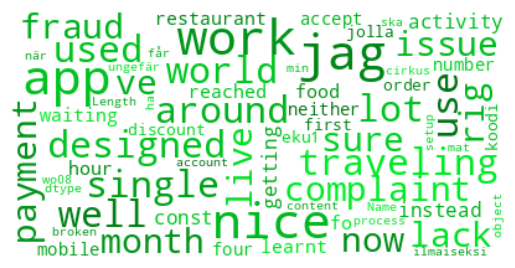

In [21]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 130
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['content']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# Sentiment Analysis 🫀 <a class="anchor" id="chapter4"></a>

In [22]:
analyser = SentimentIntensityAnalyzer()

# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

#### 🔎 Sentiment polarity scoring in natural language processing (NLP) involves the assignment of numerical values to text data to quantify the sentiment expressed within the text. These scores typically indicate whether the sentiment of the text is positive, negative, or neutral, providing insights into the overall emotional tone or opinion conveyed by the text.

In [23]:
data['sent_scores'] = data['content'].apply(lambda review: analyser.polarity_scores(review))

data.head()

,date,content,score,userName,app,platform,appVersion,sent_scores
0,2022-10-20 17:08:18,"single traveling lot work, around world - used...",5,TBeck-NARC,Bolt Food,App Store,Do not know,"{'neg': 0.025, 'neu': 0.712, 'pos': 0.263, 'co..."
1,2022-08-19 15:56:51,app well-designed nice use. complaint lack app...,4,henhouse,Bolt Food,App Store,Do not know,"{'neg': 0.165, 'neu': 0.532, 'pos': 0.303, 'co..."
2,2023-07-26 09:03:32,"i’ve payment issue month now, sure ""fraud"" rig...",1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know,"{'neg': 0.229, 'neu': 0.695, 'pos': 0.076, 'co..."
3,2022-11-22 10:00:43,live activity would nice instead getting const...,4,Sussy31,Bolt Food,App Store,Do not know,"{'neg': 0.133, 'neu': 0.474, 'pos': 0.393, 'co..."
4,2023-06-14 09:04:39,waiting hour food reached restaurant learnt fo...,1,schalas1985,Bolt Food,App Store,Do not know,"{'neg': 0.112, 'neu': 0.796, 'pos': 0.092, 'co..."


In [24]:
data['compound']  = data['sent_scores'].apply(lambda score_dict: score_dict['compound'])

data.head()

,date,content,score,userName,app,platform,appVersion,sent_scores,compound
0,2022-10-20 17:08:18,"single traveling lot work, around world - used...",5,TBeck-NARC,Bolt Food,App Store,Do not know,"{'neg': 0.025, 'neu': 0.712, 'pos': 0.263, 'co...",0.9655
1,2022-08-19 15:56:51,app well-designed nice use. complaint lack app...,4,henhouse,Bolt Food,App Store,Do not know,"{'neg': 0.165, 'neu': 0.532, 'pos': 0.303, 'co...",0.8528
2,2023-07-26 09:03:32,"i’ve payment issue month now, sure ""fraud"" rig...",1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know,"{'neg': 0.229, 'neu': 0.695, 'pos': 0.076, 'co...",-0.9515
3,2022-11-22 10:00:43,live activity would nice instead getting const...,4,Sussy31,Bolt Food,App Store,Do not know,"{'neg': 0.133, 'neu': 0.474, 'pos': 0.393, 'co...",0.7579
4,2023-06-14 09:04:39,waiting hour food reached restaurant learnt fo...,1,schalas1985,Bolt Food,App Store,Do not know,"{'neg': 0.112, 'neu': 0.796, 'pos': 0.092, 'co...",-0.4280


In [25]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"

data['sentiment'] = data['compound'].apply(Sentimnt)


data.head()

,date,content,score,userName,app,platform,appVersion,sent_scores,compound,sentiment
0,2022-10-20 17:08:18,"single traveling lot work, around world - used...",5,TBeck-NARC,Bolt Food,App Store,Do not know,"{'neg': 0.025, 'neu': 0.712, 'pos': 0.263, 'co...",0.9655,Positive
1,2022-08-19 15:56:51,app well-designed nice use. complaint lack app...,4,henhouse,Bolt Food,App Store,Do not know,"{'neg': 0.165, 'neu': 0.532, 'pos': 0.303, 'co...",0.8528,Positive
2,2023-07-26 09:03:32,"i’ve payment issue month now, sure ""fraud"" rig...",1,hsghdoenvskrbbd,Bolt Food,App Store,Do not know,"{'neg': 0.229, 'neu': 0.695, 'pos': 0.076, 'co...",-0.9515,Negative
3,2022-11-22 10:00:43,live activity would nice instead getting const...,4,Sussy31,Bolt Food,App Store,Do not know,"{'neg': 0.133, 'neu': 0.474, 'pos': 0.393, 'co...",0.7579,Positive
4,2023-06-14 09:04:39,waiting hour food reached restaurant learnt fo...,1,schalas1985,Bolt Food,App Store,Do not know,"{'neg': 0.112, 'neu': 0.796, 'pos': 0.092, 'co...",-0.4280,Negative


In [26]:
sent_df1 = data.groupby('sentiment').count()['content'].reset_index().sort_values(by='content',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
sent_df1.style.background_gradient()

,sentiment,content
2,Positive,757858
0,Negative,269808
1,Neutral,219395


In [27]:
# Calculate percentage values
total_content = sent_df1['content'].sum()
sent_df1['percentage'] = (sent_df1['content'] / total_content) * 100

# Format percentage values to two decimal places
sent_df1['percentage'] = sent_df1['percentage'].round(2)

# Create funnel chart
fig = px.funnel(sent_df1, x='percentage', y='sentiment')

# Add percentage symbol to value text
fig.update_traces(texttemplate='%{x}%')

fig.show()

In [28]:
from collections import Counter

# Function to count word occurrences
def count_words(text_column, num_words=10):
    words = [word for text in text_column for word in text.split()]
    word_freq = Counter(words)
    common_words = [word for word, freq in word_freq.most_common(num_words)]
    counts = [freq for word, freq in word_freq.most_common(num_words)]
    return pd.DataFrame({'Common_words': common_words, 'Count': counts})

# Count word occurrences
words_df = count_words(data['content'])

# Create bar plot
fig = px.bar(words_df, x="Count", y="Common_words", title='Common Words - Application Reviews', orientation='h', width=700, height=700, color='Common_words',
             labels={'Common_words': 'Common Words Score'})

# Show plot
fig.show()

In [29]:
sent_df2 = data.groupby(['app', 'sentiment']).count()['content'].reset_index().sort_values(by='content', ascending=False)
sent_df2

,app,sentiment,content
11,Uber Eats,Positive,584421
9,Uber Eats,Negative,214471
10,Uber Eats,Neutral,163274
8,Grubhub,Positive,133763
6,Grubhub,Negative,41538
7,Grubhub,Neutral,34483
5,Glovo,Positive,24226
4,Glovo,Neutral,14910
14,Wolt,Positive,11850
3,Glovo,Negative,8622


In [30]:
# Create the bar chart using Plotly Express
fig = px.bar(sent_df2, x='app', y='content', color='sentiment',
             title='Review Count by App and Sentiment',
             labels={'app': 'App', 'content': 'Review Count', 'sentiment': 'Sentiment'},
             color_discrete_map={'Positive': '#2bd96b', 'Neutral': '#f7b559', 'Negative': '#ad3141'})

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)
fig.update_layout(plot_bgcolor='white')

# Show the plot
fig.show()